### Detecção de Fraudes em Transações Financeiras com Deep Learning

O objetivo neste mini-projeto é implementar um modelo de Deep Learning, a fim de classificar, ao mais alto grau possível de precisão, fraudes de cartão de crédito de um conjunto de dados.

Um desafio ao analisar este dataset (e inerente a qualquer modelo de detecção de fraudes) é o enorme desequilíbrio no conjunto de dados: as fraudes representam apenas 0,172% das transações. Nesse caso, é muito pior ter falsos negativos do que falsos positivos em nossas previsões, pois falsos negativos significam que alguém cometeu fraude mas não fomos capazes de prever. Falsos positivos apenas causariam uma complicação para o cliente, sendo necessário uma verificação se a fraude ocorreu ou não.

### Pacotes e Módulos

In [1]:
# Pacotes de Manipulação de Dados
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Keras e TensorFlow
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Pacote Para Balanceamento de Classes
import imblearn

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sn
import scikitplot as skplt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
np.__version__

'1.19.5'

In [3]:
pd.__version__

'1.4.1'

In [4]:
sklearn.__version__

'1.0.2'

In [5]:
import keras
keras.__version__

'2.6.0'

In [6]:
tf.__version__

'2.6.0'

In [7]:
imblearn.__version__

'0.9.0'

In [8]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [9]:
sn.__version__

'0.11.2'

### Carregando os Dados

O dataset está disponível no servidor da DSA, no diretório: /media/datasets/DeepLearningI/Cap02/

In [12]:
# Carregando os dados
file = 'C:/Users/Rodrigo/Documents/ProjetosDataScience/AtividadeFormacaoIA/dados/creditcard.csv'
df = pd.read_csv(file, low_memory = False)

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Um aspecto desafiador desse conjunto de dados é que havia 30 atributos, mas para proteger a confidencialidade, 28 deles, foram transformados em PCA. As características conhecidas e não transformadas são 'Time', que mede os segundos entre a transação e a primeira transação no período de 2 dias, e 'Amount', que é o custo da transação, presumivelmente em euros. 

### Análise Exploratória de Dados

In [14]:
# Shape dos dados (linhas x colunas)
df.shape

(284807, 31)

In [15]:
# Visualizando os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
# Verificando se o dataset tem valores nulos
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:title={'center':'Correlação das Variáveis de Entrada com a Classe de Saída'}>

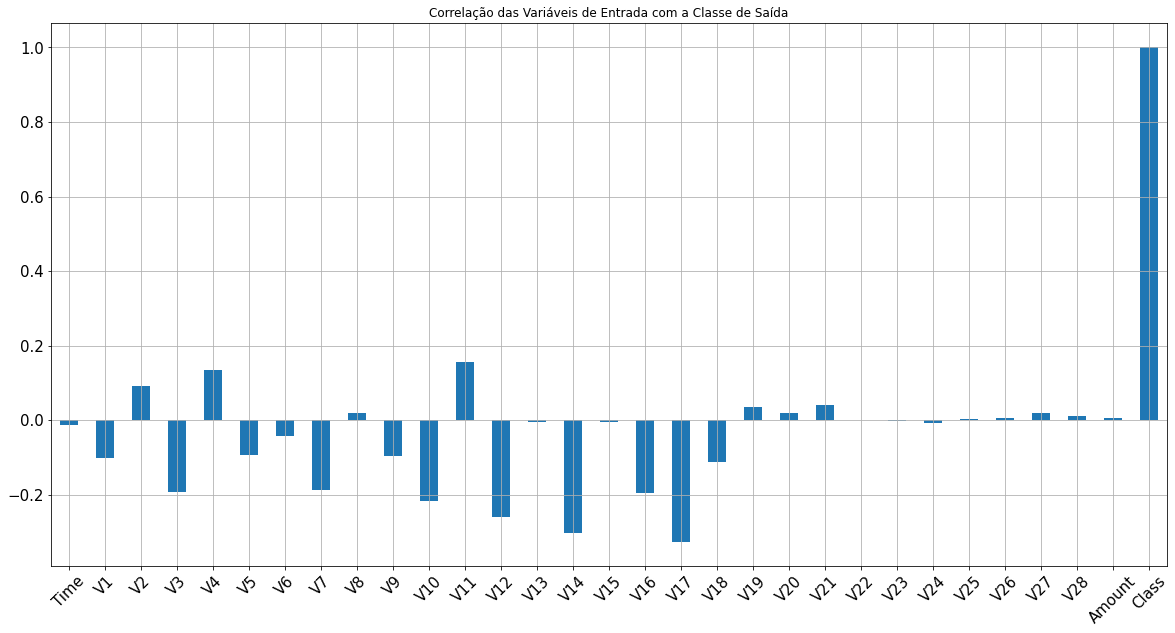

In [18]:
# Correlação de cada variável de entrada com a classe de saída
df.corrwith(df.Class).plot.bar(figsize = (20, 10), 
                               title = "Correlação das Variáveis de Entrada com a Classe de Saída", 
                               fontsize = 15, 
                               rot = 45, 
                               grid = True)

# Valores positivos indicam correlação positiva
# Valores positivos indicam correlação negativa
# Zero indica que não há correlação

In [19]:
# Resumo estatístico do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

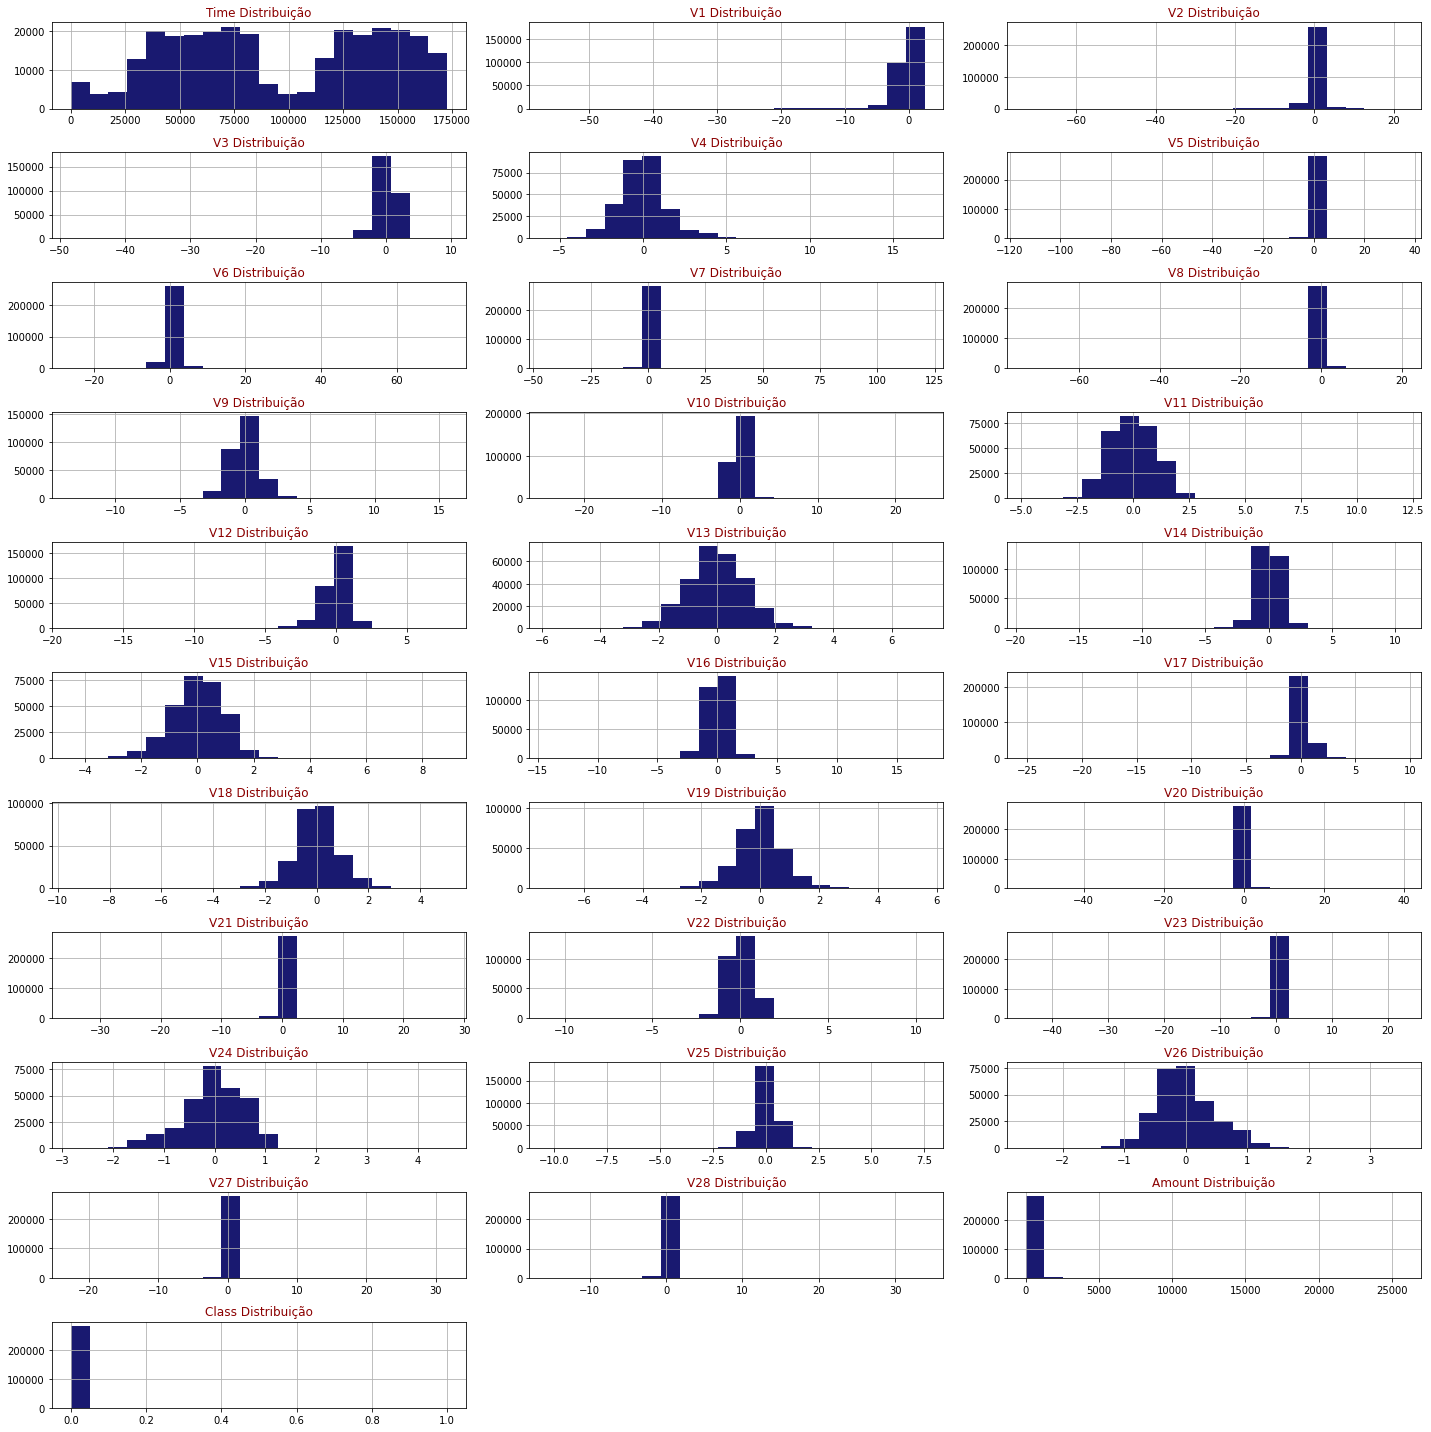

In [21]:
# Executa a função
cria_histograma(df, df.columns, 11, 3)

In [22]:
# Checando a proporção de registros por classe
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("Temos", len(frauds), "pontos de dados como fraude e", len(non_frauds), "pontos de dados considerados normais.")

Temos 492 pontos de dados como fraude e 284315 pontos de dados considerados normais.


### Rede Neural Simples

Vamos começar criando uma rede neural simples, sem fazer qualquer tratamento nos dados.

In [23]:
# Cria a primeira versão do modelo
modelo1 = Sequential()

# Adiciona as camadas
modelo1.add(Dense(30, input_dim = 30, activation = 'relu'))     
modelo1.add(Dense(1, activation = 'sigmoid')) 

# Compila com a otimização e função de custo
modelo1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Resumo do modelo
modelo1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Separando os dados em entrada (X) e saída (y)
X = df.iloc[:,:-1]
y = df['Class']

In [25]:
# Dividindo os dados em dataset de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
# Treinamento do modelo
modelo1.fit(X_treino.values, y_treino, epochs = 1)

6676/6676 [==============================] - 16s 2ms/step - loss: 29.8810 - accuracy: 0.9930


In [27]:
# Avaliação do modelo com dados de teste
print("Erro/Acurácia em Teste: ", modelo1.evaluate(X_teste.values, y_teste, verbose = 0))

Erro/Acurácia em Teste:  [12.710119247436523, 0.9983567595481873]


In [28]:
# Fazendo previsões com o modelo
y_previsto = modelo1.predict(X_teste.values).T[0].astype(int)

In [29]:
# Classification Report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_teste, y_previsto, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     71089
     Class 1       0.00      0.00      0.00       113

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



In [30]:
# Score AUC
print(roc_auc_score(y_teste, y_previsto))

0.4999859331260814


In [31]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto)
print(cm)

[[71087     2]
 [  113     0]]


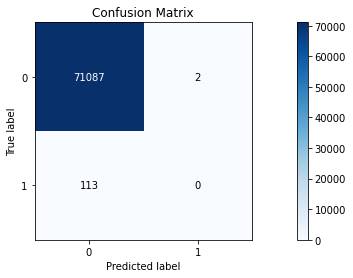

In [32]:
# Confusion Matrix Gráfica
skplt.metrics.plot_confusion_matrix(y_teste, y_previsto)
plt.show()

Nosso modelo tem 99% de acurácia. Isso parece bom?

Observando a matriz de confusão, percebemos uma quantidade muito grande de previsões certas para uma classe, muito mais do que para outra. Como o modelo recebeu mais registros de uma das classes, aprendeu muito mais sobre ela e logo considera quase tudo como não sendo fraude. Além disso, o valor da AUC é muito baixo.

Vamos resolver isso.

### Balanceamento de Classe

Para o balanceamento, usaremos a técnica de Oversampling, aplicando um procedimento estatístico chamado SMOTE (Synthetic Minority Over-sampling Technique), que permite aumentar a quantidade de registros da classe minoritária.

In [33]:
# Verificando se a variável resposta está balanceada
target_count = df.Class.value_counts()
target_count

0    284315
1       492
Name: Class, dtype: int64

C:\Users\Rodrigo\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


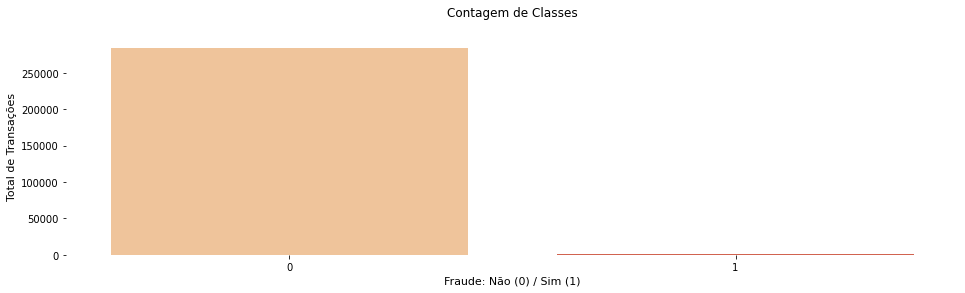

In [34]:
# Plot 
sn.countplot(df.Class, palette = "OrRd")
plt.box(False)
plt.xlabel('Fraude: Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total de Transações', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [35]:
# Oversampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separando os dados em entrada (X) e saída (y)
X = df.iloc[:,:-1]
y = df['Class']

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

C:\Users\Rodrigo\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


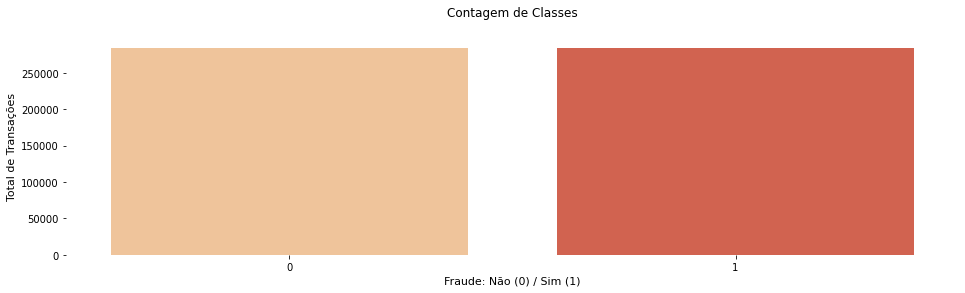

In [36]:
# Plot 
sn.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Fraude: Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total de Transações', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [37]:
X_res.shape

(568630, 30)

In [38]:
y_res.shape

(568630,)

In [39]:
# Dividindo os dados em dataset de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)

### Segunda Versão do Modelo

In [40]:
# Cria a segunda versão do modelo com mais uma camada de neurônios
modelo2 = Sequential()

# Adiciona as camadas
modelo2.add(Dense(30, input_dim = 30, activation = 'relu'))  
modelo2.add(Dense(30, activation = 'relu'))
modelo2.add(Dense(1, activation = 'sigmoid')) 

# Compila com a otimização e função de custo
modelo2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Resumo do modelo
modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Treinamento do modelo
modelo2.fit(X_treino, y_treino, epochs = 3)

Epoch 1/3
13328/13328 [==============================] - 34s 3ms/step - loss: 18.4457 - accuracy: 0.8107
Epoch 2/3
13328/13328 [==============================] - 35s 3ms/step - loss: 5.6740 - accuracy: 0.9294
Epoch 3/3
13328/13328 [==============================] - 34s 3ms/step - loss: 2.7354 - accuracy: 0.9399


In [42]:
# Avaliação do modelo com dados de teste
print("Erro/Acurácia em Teste: ", modelo2.evaluate(X_teste.values, y_teste, verbose = 0))

Erro/Acurácia em Teste:  [0.6664014458656311, 0.9680074453353882]


In [43]:
# Fazendo previsões com o modelo
y_previsto = modelo2.predict(X_teste.values).T[0].astype(int)

In [44]:
# Classification Report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_teste, y_previsto, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97     71023
     Class 1       0.98      0.96      0.97     71135

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



In [45]:
# Score AUC
print(roc_auc_score(y_teste, y_previsto))

0.9729111978364217


In [46]:
# Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
print(cm)

[[69803  1220]
 [ 2632 68503]]


In [47]:
type(y_previsto)

numpy.ndarray

In [48]:
type(y_teste)

pandas.core.series.Series

In [49]:
y_teste = np.array(y_teste)

In [50]:
type(y_teste)

numpy.ndarray

O comportamento agora parece bem melhor, não? Uma mudança simples nos dados que fez toda a diferença. E outras técnicas poderiam ser aplicadas, como redução de dimensionalidade ou padronização dos dados.

### Relatório Final de Performance do Modelo

In [51]:
# Variáveis
false_neg = 0
false_pos = 0
incorretos = 0
total = len(y_teste)

# Loop pelas previsões e valores reais
for i in range(0, len(y_teste)):
    if (y_previsto[i] != y_teste[i]):
        incorretos += 1
        if (y_teste[i] == 1 and y_previsto[i] == 0):
            false_neg += 1
        else:
            false_pos += 1

inaccuracy = incorretos / total

print('Inacurácia:', inaccuracy * 100)
print('Acurácia:', (1 - inaccuracy) * 100)
print('Taxa de Falsos Negativos:', false_neg / incorretos * 100)
print('Taxa de Falsos Positivos:', false_pos / incorretos * 100)

Inacurácia: 2.709661081332039
Acurácia: 97.29033891866796
Taxa de Falsos Negativos: 68.32814122533749
Taxa de Falsos Positivos: 31.671858774662514


Nosso modelo tem um bom desempenho geral, mas a taxa de falsos negativos ainda está alta. Poderíamos experimentar algumas técnicas, como redução de dimensionalidade dos dados, padronização, ajuste dos hiperparâmetros, mudança da arquitetura da rede ou mesmo aumentar o tempo total de treinamento.